In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from fsmodels import MultiExpFrequencyScan

In [2]:
fs = MultiExpFrequencyScan(n_exps=3,
                           exps_params=[[-1.0, 3.5],
                                        [-2.3, 3.0],
                                        [-3.5, 2.5]]
                          )

In [3]:
frequency_powers = np.linspace(0, 3.5, 100)
frequency_powers = tf.Variable(frequency_powers, dtype='float64')
experimental_dlts = fs(frequency_powers) 
experimental_dlts += np.random.normal(loc=0, scale=0.2, size=experimental_dlts.shape[0])

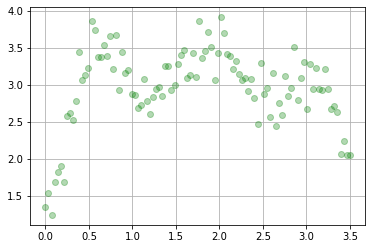

In [4]:
plt.plot(frequency_powers.numpy(), experimental_dlts.numpy(), 'og', alpha=0.3)
plt.grid()
plt.show()

сделать проверку размерности массива exps_params. размерность должна быть равна \[n_exps, 2\]

In [5]:
fs = MultiExpFrequencyScan(n_exps=3,
                           exps_params=[[np.random.uniform(low=-3.5, high=-1), 1.0],
                                        [np.random.uniform(low=-3.5, high=-1), 1.0],
                                        [np.random.uniform(low=-3.5, high=-1), 1.0]],
                           n_iters=200,
                           stop_val=10**-5,
                           verbose=True
                          )

initial_dlts = fs(frequency_powers)

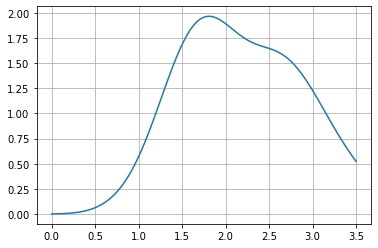

In [6]:
plt.plot(frequency_powers.numpy(), initial_dlts.numpy())

plt.grid()
plt.show()

In [7]:
fs.fit(frequency_powers, experimental_dlts)

iter # 0
exps_params:
 [[-3.17099011  1.        ]
 [-1.92914736  1.        ]
 [-2.24636893  1.        ]]
Loss: 4.145513822301692
iter # 1
exps_params:
 [[-3.15027954  1.09704722]
 [-1.87790648  1.12509103]
 [-2.22022355  1.11319964]]
Loss: 3.7445950421265155
iter # 2
exps_params:
 [[-3.1363801   1.18770139]
 [-1.81480582  1.23872963]
 [-2.19562775  1.21397207]]
Loss: 3.393709846532364
iter # 3
exps_params:
 [[-3.12781862  1.27308759]
 [-1.73936851  1.34335543]
 [-2.17500464  1.30450684]]
Loss: 3.07249413519793
iter # 4
exps_params:
 [[-3.12276882  1.35416066]
 [-1.65107441  1.44144133]
 [-2.16054745  1.38695343]]
Loss: 2.7633278866381135
iter # 5
exps_params:
 [[-3.11949892  1.43158029]
 [-1.55038536  1.53549612]
 [-2.15350047  1.46348165]]
Loss: 2.4534124467912077
iter # 6
exps_params:
 [[-3.11677999  1.50565671]
 [-1.44095651  1.62786075]
 [-2.15312399  1.53624792]]
Loss: 2.1417717890426444
iter # 7
exps_params:
 [[-3.11417309  1.5763821 ]
 [-1.33201     1.72005646]
 [-2.15607089  1.

iter # 63
exps_params:
 [[-3.46267152  2.55989132]
 [-0.99170997  3.33381191]
 [-2.25923533  2.88848909]]
Loss: 0.05625018813526829
iter # 64
exps_params:
 [[-3.4644769   2.55996487]
 [-0.99174137  3.3390051 ]
 [-2.26038311  2.89305705]]
Loss: 0.05573682646729
iter # 65
exps_params:
 [[-3.46620798  2.55994403]
 [-0.99177462  3.34397016]
 [-2.26149069  2.89745071]]
Loss: 0.05526488037500501
iter # 66
exps_params:
 [[-3.46786805  2.55983601]
 [-0.99180947  3.34871766]
 [-2.26255963  2.90167788]]
Loss: 0.05483068388391463
iter # 67
exps_params:
 [[-3.46946025  2.55964757]
 [-0.99184567  3.35325766]
 [-2.26359142  2.90574593]]
Loss: 0.05443091687095977
iter # 68
exps_params:
 [[-3.4709876   2.55938502]
 [-0.991883    3.35759973]
 [-2.26458749  2.9096619 ]]
Loss: 0.054062570854932795
iter # 69
exps_params:
 [[-3.47245293  2.55905428]
 [-0.99192126  3.36175298]
 [-2.2655492   2.91343247]]
Loss: 0.0537229183134545
iter # 70
exps_params:
 [[-3.47385898  2.55866089]
 [-0.99196027  3.36572605]
 

iter # 125
exps_params:
 [[-3.50516271  2.51567559]
 [-0.99356708  3.4481124 ]
 [-2.28974981  3.00609944]]
Loss: 0.04924193643098958
iter # 126
exps_params:
 [[-3.50534385  2.5150491 ]
 [-0.99358165  3.44850798]
 [-2.28991177  3.00672608]]
Loss: 0.049232049713929464


,exps_params,loss
0,"[[-3.1709901101295177, 1.0], [-1.9291473611040...",4.145514
1,"[[-3.1502795426260377, 1.0970472163109708], [-...",3.744595
2,"[[-3.136380099521668, 1.187701389705102], [-1....",3.39371
3,"[[-3.1278186217158903, 1.2730875949079372], [-...",3.072494
4,"[[-3.1227688160584344, 1.354160656836317], [-1...",2.763328
...,...,...
122,"[[-3.5045833499271897, 2.517619033539071], [-0...",0.049275
123,"[[-3.5047826835512788, 2.5169605111348483], [-...",0.049263
124,"[[-3.5049757254299014, 2.5163127077926912], [-...",0.049252
125,"[[-3.5051627064658866, 2.5156755872756342], [-...",0.049242


In [8]:
for scan in fs._fs_list:
    print(scan)

In [9]:
for i, f in enumerate(fs._fs_list):
    print(f'Amplitude {i} : {f.amplitude}')
    print(f'Time constant power {i} : {f.time_constant_power}')

Amplitude 0 : 2.514433203046603
Time constant power 0 : -3.5055193623537493
Amplitude 1 : 3.4488888144639973
Time constant power 1 : -0.9935958311015269
Amplitude 2 : 3.007336360140147
Time constant power 2 : -2.290069270302197


In [10]:
fs.exps_params

array([[-3.50551936,  2.5144332 ],
       [-0.99359583,  3.44888881],
       [-2.29006927,  3.00733636]])

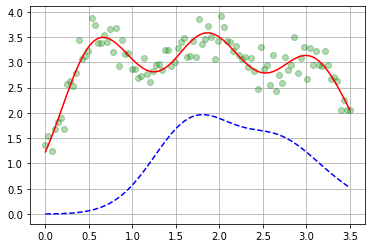

In [11]:
final_model = fs(frequency_powers)

plt.plot(frequency_powers.numpy(), experimental_dlts.numpy(), 'og', alpha=0.3)
plt.plot(frequency_powers.numpy(), initial_dlts.numpy(), '--b')
plt.plot(frequency_powers.numpy(), final_model.numpy(), '-r')

plt.grid()
plt.show()